<a href="https://colab.research.google.com/github/noswolf/DSA_BIT/blob/master/Week6/DSA_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement a Tree using List of Lists (Array).

[Small Tree](https://runestone.academy/runestone/books/published/pythonds/_images/smalltree.png)

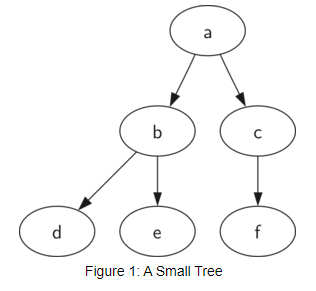

In [ ]:
# A small tree with left and right subtrees
# A subtree that has a root value and two empty lists is a leaf node
smallTree = ['A',   #root 
             ['B',  #left subtree
              ['D', [], []],
              ['E', [], []] ],
             ['C',  #right subtree
              ['F', [], []],
              []]
             ]

In [ ]:
print(smallTree)

['A', ['B', ['D', [], []], ['E', [], []]], ['C', ['F', [], []], []]]


In [ ]:
print('root = ', smallTree[0])
print('left subtree = ', smallTree[1])
print('right subtree = ', smallTree[2])

root =  A
left subtree =  ['B', ['D', [], []], ['E', [], []]]
right subtree =  ['C', ['F', [], []], []]


A subtree that has a root value and two empty lists is a leaf node.

In [ ]:
print('leaf node D =', smallTree[1][1] )

leaf node D = ['D', [], []]


The `BinaryTree` function creates a list with a root node and two empty sublists for the children.

*   To add a left subtree to the root, a new list has to be inserted into the 2nd position of the root list.
  * However, if there is already a node in that position, the new list needs to be pused down the tree as the left child of the list.
*   Adding right subtree can be executed by inserting into the 3rd position of the root list.



In [ ]:
def BinaryTree(r):
  return [r, [], []]

""" Insertion methods """
def insertLeft(root, newBranch):
  t = root.pop(1)                       # Obtain list that corresponds to the current left child of the root
  if len(t) > 1:                        # If left child is not empty, push the old left child as the left child of the new node.
    root.insert(1, [newBranch, t, []])
  else:                                 # If left child is empty
    root.insert(1, [newBranch,[],[]])
  return root

def insertRight(root, newBranch):
  t = root.pop(2)                       # Obtain list that corresponds to the current right child of the root
  if len(t) > 1:                        # If right child is not empty, push the old right child as the right child of the new node.
    root.insert(2, [newBranch, [], t])
  else:                                 # If right child is empty
    root.insert(2, [newBranch, [], []]) 
  return root

""" Accessor methods """
def getRootVal(root):
  return root[0]

def setRootVal(root, newVal):
  root[0] = newVal

def getLeftChild(root):
  return root[1]

def getRightChild(root):
  return root[2]

In [ ]:
r = BinaryTree(3)    # contents = [3, [], []]
insertLeft(r,4)      # contents = [3, [4, [], []], []]
insertLeft(r,5)      # contents = [3, [5, [4, [], []], []], []]
insertRight(r,6)     # contents = [3, [5, [4, [], []], []], [6, [], []]]
insertRight(r,7)     # contents = [3, [5, [4, [], []], []], [7, [], [6, [], []]]] 
l = getLeftChild(r)   # [5, [4, [], []], []]
print(l)

[5, [4, [], []], []]


In [ ]:
setRootVal(l,9)      # contents = [3, [9, [4, [], []], []], [7, [], [6, [], []]]] 
print(r)
insertLeft(l,11)     # contents = [3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]] 
print(r)
print(getRightChild(getRightChild(r)))  # [6, [], []]

[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


# Implement a Tree using Nodes and References (Doubly Linked Lists).

In [ ]:
class BinaryTree:
  """ Tree implementation using node and reference"""
  def __init__(self, element):
    self._element = element        # reference to user’s element
    self._leftChild = None         # reference to left child
    self._rightChild = None        # reference to right child

  """ Insertion methods """
  def insertLeft(self, newNode):
    new_node = BinaryTree(newNode)
    if self._leftChild == None:    # No existing left child, add a node to the left
      self._leftChild = new_node
    else:                         # Insert a node and pust the old child down one level
      new_node._leftChild = self._leftChild
      self._leftChild = new_node
    
  
  def insertRight(self, newNode):
    new_node = BinaryTree(newNode)
    if self._rightChild == None:    # No existing right child, add a node to the right
      self._rightChild = new_node
    else:                         # Insert a node and pust the old child down one level
      new_node.rightChild = self._rightChild
      self._rightChild = new_node


  """ Accessor methods """
  def getRightChild(self):
    return self._rightChild

  def getLeftChild(self):
    return self._leftChild

  def setRootVal(self,e):
    self._element = e

  def getRootVal(self):
    return self._element

Small Tree represented by nodes and references 

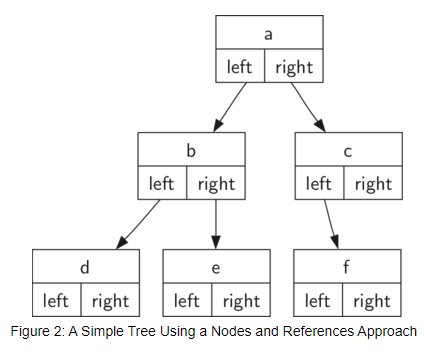

In [ ]:
r = BinaryTree('a')                   # contents = [a, [], []]
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')                     # contents = [a, [b, [], []], []]
print(r.getLeftChild().getRootVal())
r.insertRight('c')                    # contents = [a, [b, [], []], [c, [], []]]
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello') # contents = [a, [b, [], []], [hello, [], []]]
print(r.getRightChild().getRootVal())

a
None
b
c
hello


Reference: Problem Solving with Algorithms and Data Structures using Python by Bradley N. Miller, David L. Ranum (CC BY-NC-SA 4.0)